In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data=pd.read_csv("F:\Gam3a lecs\Machine\games-classification-dataset.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,High


In [3]:
X=data.drop('Rate',axis=1)
y=data['Rate']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [5]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [7]:
train_data.shape

(4171, 18)

In [8]:
train_data.describe()

,ID,User Rating Count,Price,Size
count,4.171000e+03,4.171000e+03,4171.000000,4.171000e+03
mean,8.661515e+08,4.145890e+03,0.602407,1.381858e+08
std,2.945126e+08,5.543394e+04,2.730678,2.554433e+08
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05
25%,5.952646e+08,1.300000e+01,0.000000,2.761677e+07
50%,9.177783e+08,5.000000e+01,0.000000,6.700851e+07
75%,1.112485e+09,3.380000e+02,0.000000,1.591173e+08
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09


In [9]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Rate                               0
dtype: int64

In [10]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [11]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [12]:
train_data.duplicated().sum()
#remove them

25

In [13]:
train_data.drop_duplicates(inplace=True)

# EDA

<AxesSubplot:xlabel='Rate', ylabel='count'>

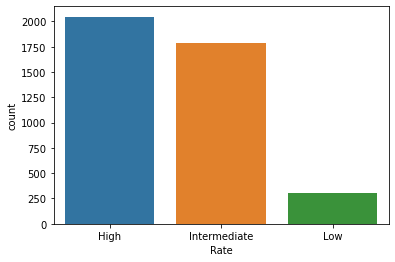

In [14]:
sns.countplot(x=train_data['Rate'])

data is unBalnced

<AxesSubplot:xlabel='Age Rating', ylabel='count'>

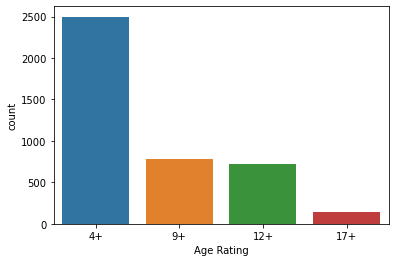

In [15]:
sns.countplot(x=train_data['Age Rating'])

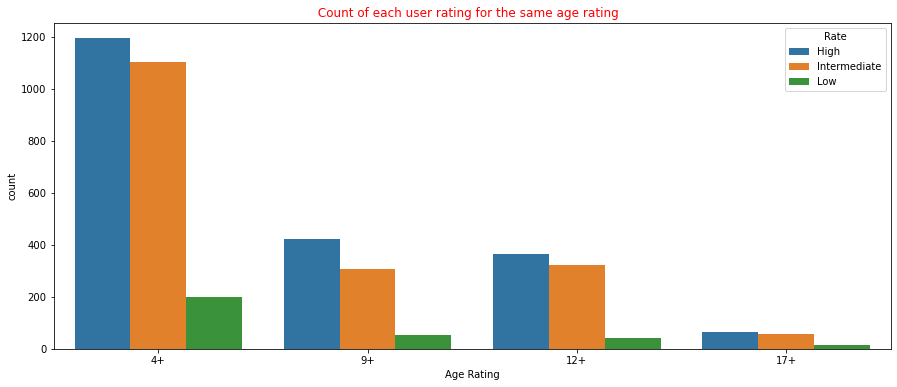

In [16]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Rate', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

disturbation is the same in all Age ratings >>> Not affected

In [17]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


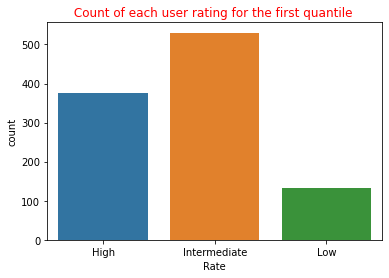

In [18]:
sns.countplot(x=x1['Rate'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

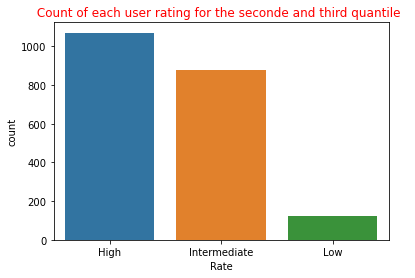

In [19]:
sns.countplot(x=x2['Rate'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

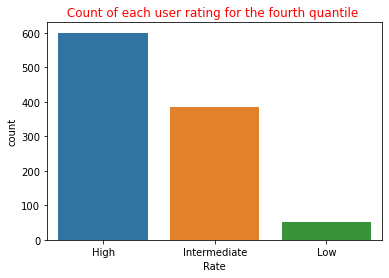

In [20]:
sns.countplot(x=x3['Rate'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

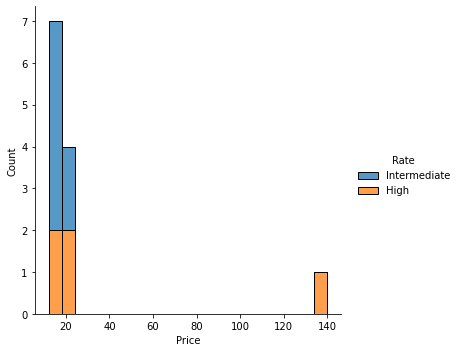

In [21]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Rate", multiple="stack")

In [22]:
len(u)

12

If price increasing does it affect to rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

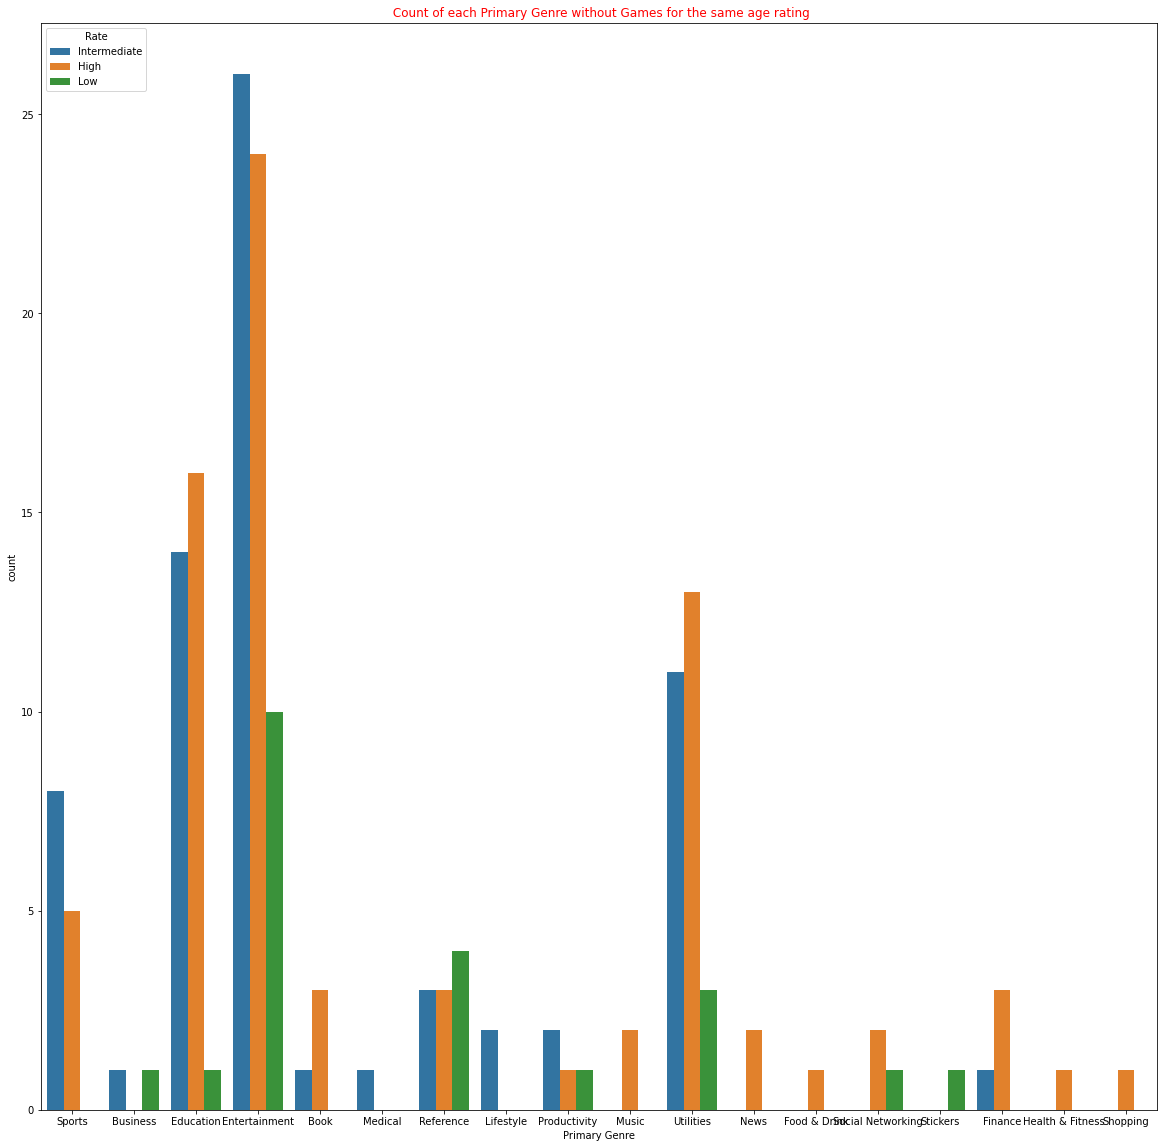

In [23]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Rate', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [24]:
len(u)

169

In [25]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [26]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_9008/3607878080.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_9008/3607878080.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [27]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_9008/2599777923.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

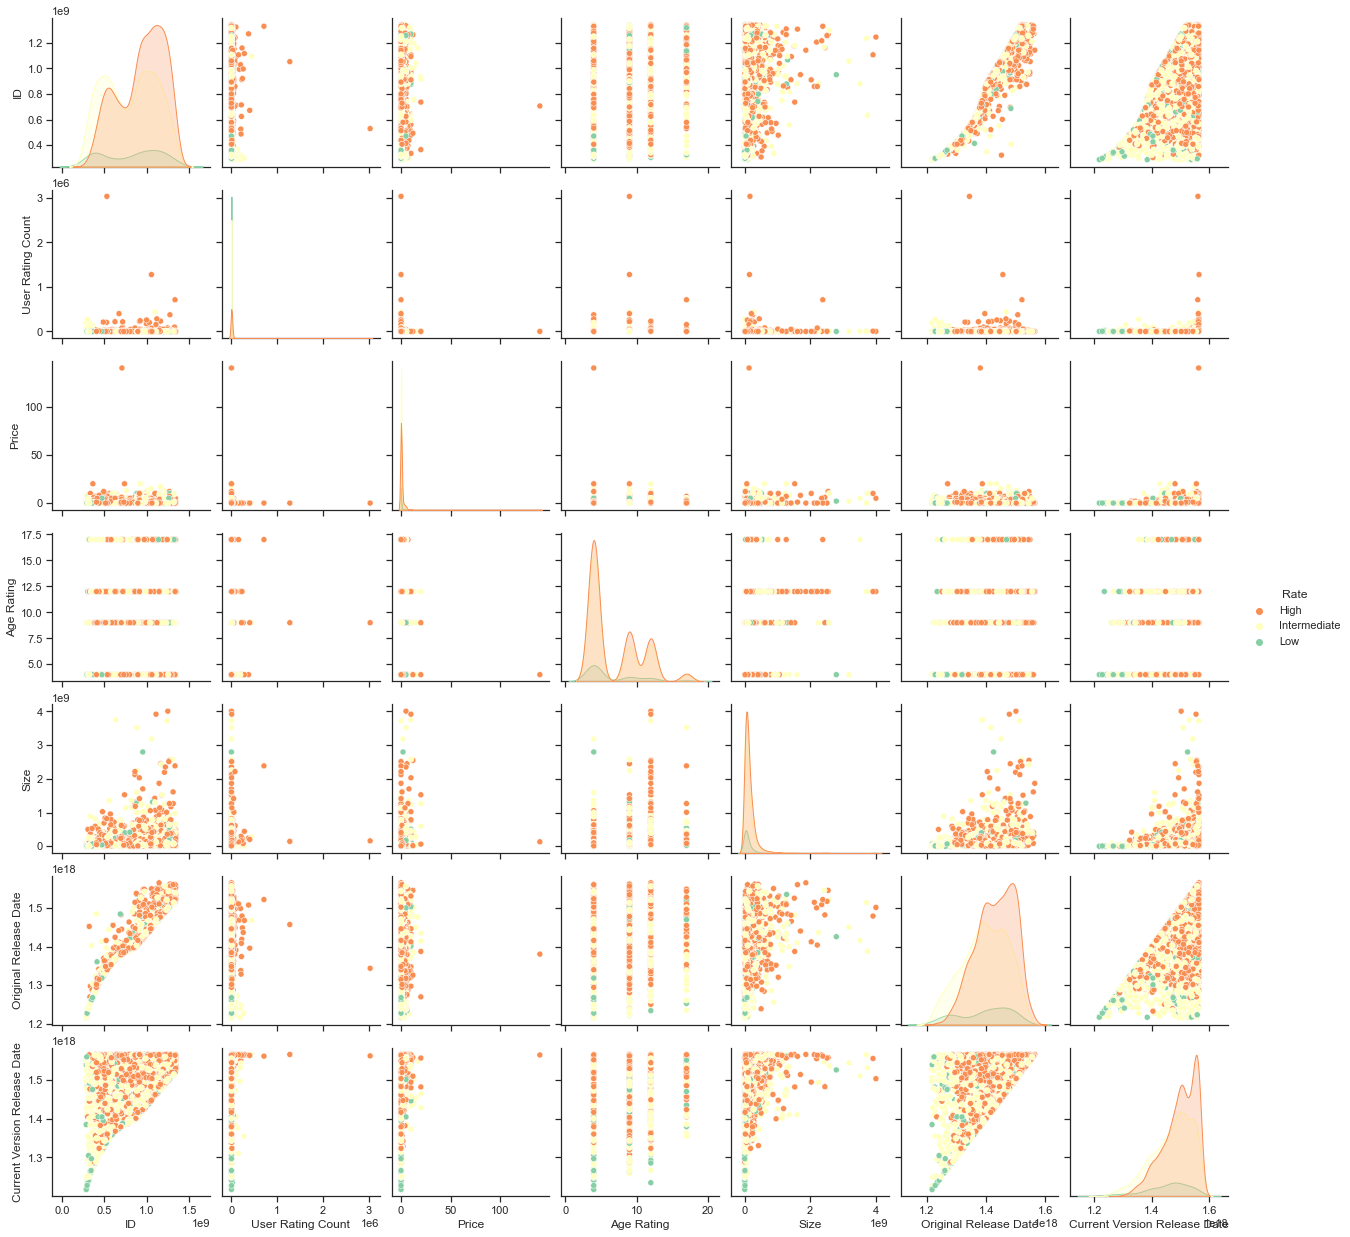

In [28]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Rate",palette="Spectral")

In [29]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [30]:
train_data['Name'].is_unique

True

In [31]:
train_data['ID'].is_unique

True

In [32]:
train_data['URL'].is_unique

True

In [33]:
train_data['Icon URL'].is_unique

True

In [34]:
train_data['Primary']=train_data['Primary Genre']

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Primary'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.002017


In [37]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Developer'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.000000


In [38]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Languages'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.352535


In [39]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Genres'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.013257


In [40]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_data['Rate']= label_encoder.fit_transform(train_data['Rate'])

In [41]:
train_data['Rate']

253     0
2592    0
1605    0
4661    0
2       0
       ..
3335    1
1099    0
2514    0
3606    0
2575    0
Name: Rate, Length: 4146, dtype: int32

<AxesSubplot:>

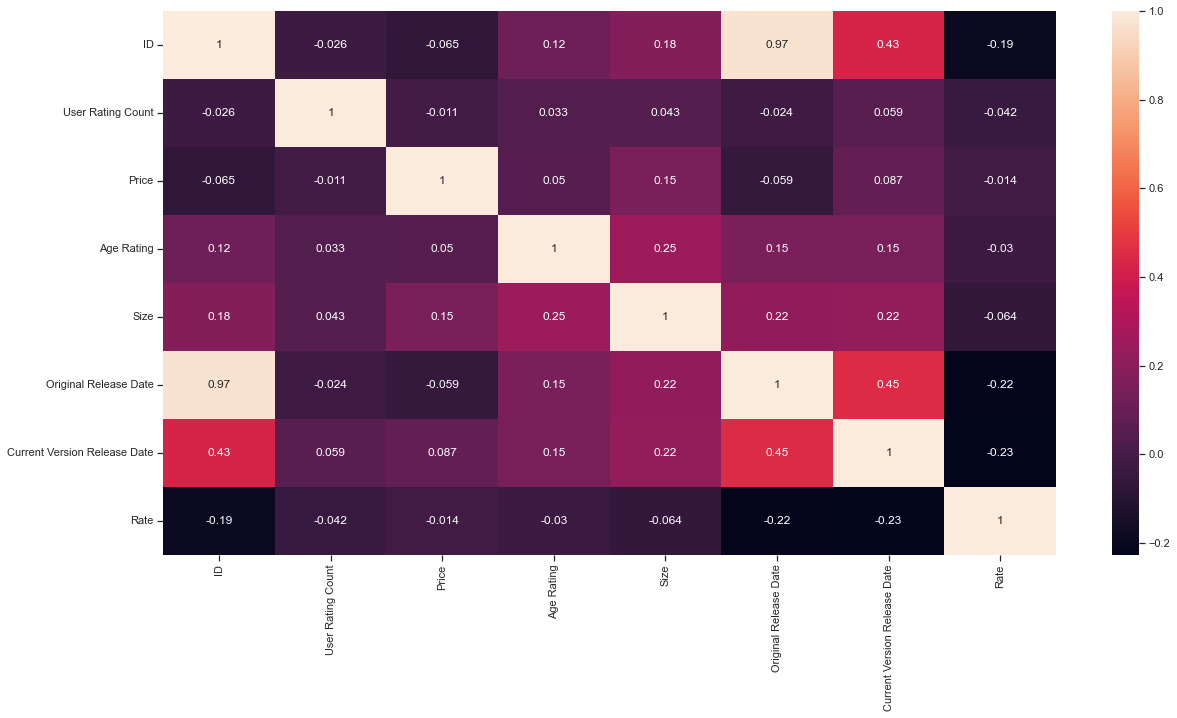

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [43]:
train_data.drop(['URL','Icon URL','Name','ID','Description','Languages','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Developer                     4146 non-null   object
 1   Primary Genre                 4146 non-null   object
 2   Genres                        4146 non-null   object
 3   Original Release Date         4146 non-null   int64 
 4   Current Version Release Date  4146 non-null   int64 
 5   Rate                          4146 non-null   int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 339.6+ KB


In [45]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [46]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [47]:
traain,list_unquie_train=one_hot_encoding(train_data,['Genres','Developer','Primary Genre'])

In [48]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [49]:
traain['anomaly'] = model_IF.predict(traain)
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [50]:
X_train=traain.drop(['Rate','anomaly'],axis=1)
y_train=traain['Rate']

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_std = sc.fit_transform(X_train)

In [52]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','Name','ID','Description','Languages','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)


In [53]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_9008/3821080522.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_9008/3821080522.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [54]:
test_data.isnull().sum().sort_values(ascending=False)

Developer                       0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Rate                            0
dtype: int64

In [55]:
teest=update_with_new_columns(test_data,list_unquie_train,['Genres','Developer','Primary Genre'])

In [56]:
X_test=teest.drop(['Rate'],axis=1)
y_test=teest['Rate']

In [57]:
X_test_std = sc.transform(X_test)

In [58]:
X_train_std.shape

(4146, 2722)

In [59]:
X_test_std.shape

(1043, 2722)

## Grid search

In [60]:
from sklearn.model_selection import GridSearchCV

def grid_search (estimator, id ,param_grid):

    g_search = GridSearchCV(
    estimator= estimator, 
    param_grid= param_grid,
    scoring = 'accuracy',
    cv=5
    )

    g_search.fit(X_train_std, y_train)

    print(f"{id}  BESt ESTIMATOR: {g_search.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {g_search.best_params_}")
    print(f"{id}  BEST SCORE: {g_search.best_score_}")


## $\text{Logistic Regression}$

In [61]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

param_grid ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

grid_search(logreg, "Logistic regression", param_grid)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic regression  BESt ESTIMATOR: LogisticRegression(C=10.0)
Logistic regression  BEST PARAMETERS: {'C': 10.0, 'penalty': 'l2'}
Logistic regression  BEST SCORE: 0.6063592367055678


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## $\text{Decision Tree}$

In [62]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)

grid_search(tree_clas, "Decision Tree", param_grid)



D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

Decision Tree  BESt ESTIMATOR: DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=1024)
Decision Tree  BEST PARAMETERS: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
Decision Tree  BEST SCORE: 0.5221951254959525


D:\anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


## $\text{Random Forest}$

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8,10],
    'criterion' :['gini', 'entropy']
}

grid_search(rfc, "Random forest", param_grid)

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

Random forest  BESt ESTIMATOR: RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200,
                       random_state=42)
Random forest  BEST PARAMETERS: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Random forest  BEST SCORE: 0.5617451712761783


## $\text{Naive Bayes}$

In [64]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search(model, "Naive", params_NB)

Naive  BESt ESTIMATOR: GaussianNB(var_smoothing=0.12328467394420659)
Naive  BEST PARAMETERS: {'var_smoothing': 0.12328467394420659}
Naive  BEST SCORE: 0.5470251573241095


## $\text{XGB}$

In [66]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_jobs=-1)
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.1,1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
}

grid_search(xgb, "XGBClassifier", params)

KeyboardInterrupt: 

## $\text{Best Models}$